---
title: Data Screening
description: Screening and filtering data from the IGN catalog down to the relevant events for La Palma
authors:
  - name: Steve Purves
    orcid: 0000-0002-0760-5497
  - name: Charlotte Wickham
    note: Edited original notebook by Steve Purves
jupyter: python3
---

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Import `la-palma.csv` - a clean subset of [`catalogoComunSV_1663233588717.csv`](https://github.com/Notebooks-Now/submission-quarto-full/blob/main/data/catalogoComunSV_1663233588717.csv):

In [3]:
df = pd.read_csv("la-palma.csv")
df["DateTime"] = pd.to_datetime(df["DateTime"])
df = df.sort_values(by=["DateTime"], ascending=True)
df.head()

,Longitude,Latitude,Depth(km),Magnitude,DateTime
11346,-17.8349,28.5346,26.0,1.6,2017-03-09 23:44:06+00:00
11343,-17.8459,28.5491,27.0,2.0,2017-03-10 00:16:10+00:00
11344,-17.8863,28.5008,20.0,2.1,2017-03-10 00:16:11+00:00
11345,-17.8657,28.5204,30.0,1.6,2017-03-10 03:20:26+00:00
11342,-17.7156,28.5985,0.0,1.6,2017-08-21 02:06:55+00:00


In [4]:
df.describe()

,Longitude,Latitude,Depth(km),Magnitude
count,11347.000000,11347.000000,11347.000000,11347.000000
mean,-17.844062,28.568893,14.089345,2.432423
std,0.027345,0.021899,8.624787,0.705282
min,-17.995800,28.310200,0.000000,0.200000
25%,-17.854100,28.558000,10.100000,1.900000
50%,-17.838700,28.564000,11.300000,2.600000
75%,-17.829700,28.574300,13.900000,2.900000
max,-17.705700,28.697800,46.900000,5.100000


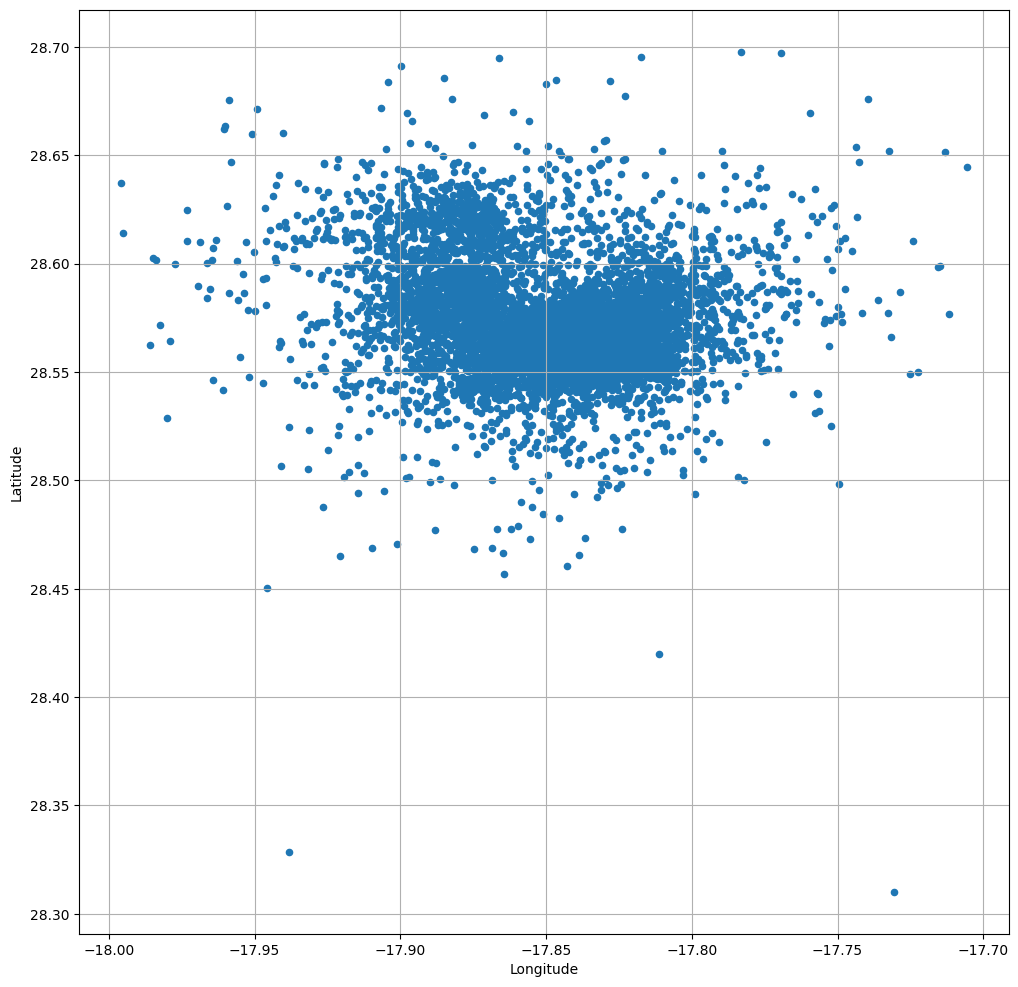

In [5]:
df.plot.scatter(x="Longitude", y="Latitude", figsize=(12, 12), grid="on");

### Filter 

Also some rows seem to be missing depth measurements, (see differences in the **count** for columns above) - take only rows with valid depths

In [6]:
df = df[df["Depth(km)"].notna()]
df.describe()

,Longitude,Latitude,Depth(km),Magnitude
count,11347.000000,11347.000000,11347.000000,11347.000000
mean,-17.844062,28.568893,14.089345,2.432423
std,0.027345,0.021899,8.624787,0.705282
min,-17.995800,28.310200,0.000000,0.200000
25%,-17.854100,28.558000,10.100000,1.900000
50%,-17.838700,28.564000,11.300000,2.600000
75%,-17.829700,28.574300,13.900000,2.900000
max,-17.705700,28.697800,46.900000,5.100000


<Axes: ylabel='Frequency'>

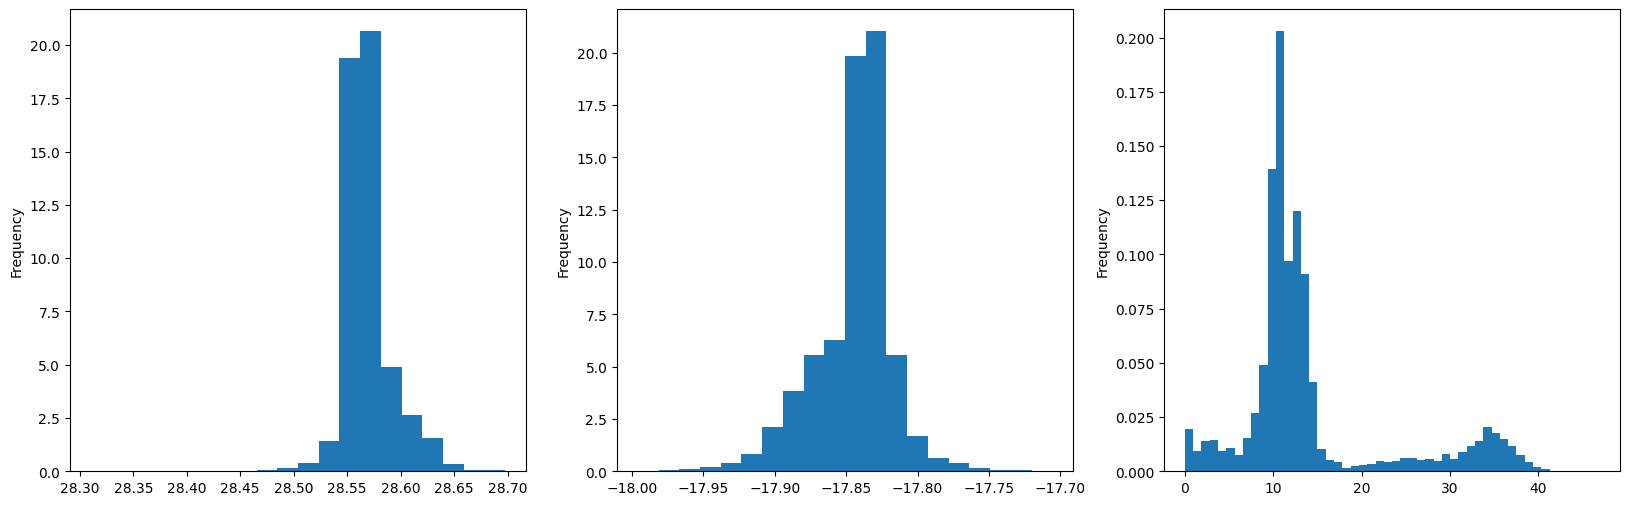

In [7]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
df["Latitude"].plot.hist(bins=20, density=True)
plt.subplot(1, 3, 2)
df["Longitude"].plot.hist(bins=20, density=True)
plt.subplot(1, 3, 3)
df["Depth(km)"].plot.hist(bins=50, density=True)

## Spatial Plot

Scatter plot the spatial locations of events

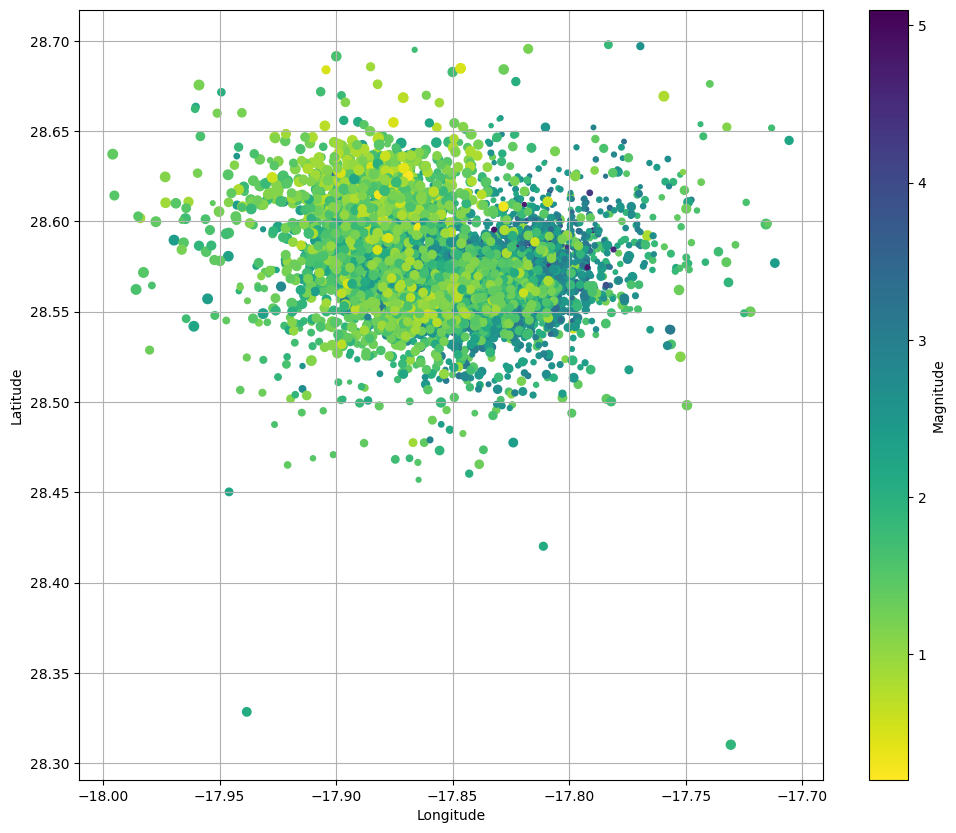

In [8]:
# | label: fig-spatial-plot
# | fig-cap: Locations of earthquakes on La Palma since 2017.
# | fig-alt: "A scatterplot of earthquake locations plotting latitude against longitude."
from matplotlib import colormaps

cmap = colormaps["viridis_r"]
ax = df.plot.scatter(
    x="Longitude",
    y="Latitude",
    s=47 - df["Depth(km)"],
    c=df["Magnitude"],
    figsize=(12, 10),
    grid="on",
    cmap=cmap,
)
colorbar = ax.collections[0].colorbar
colorbar.set_label("Magnitude")

plt.show()

### Timeline Plot

Scatter plot the event time series and look for any quantization issues. Have times & dates been loaded correctly?

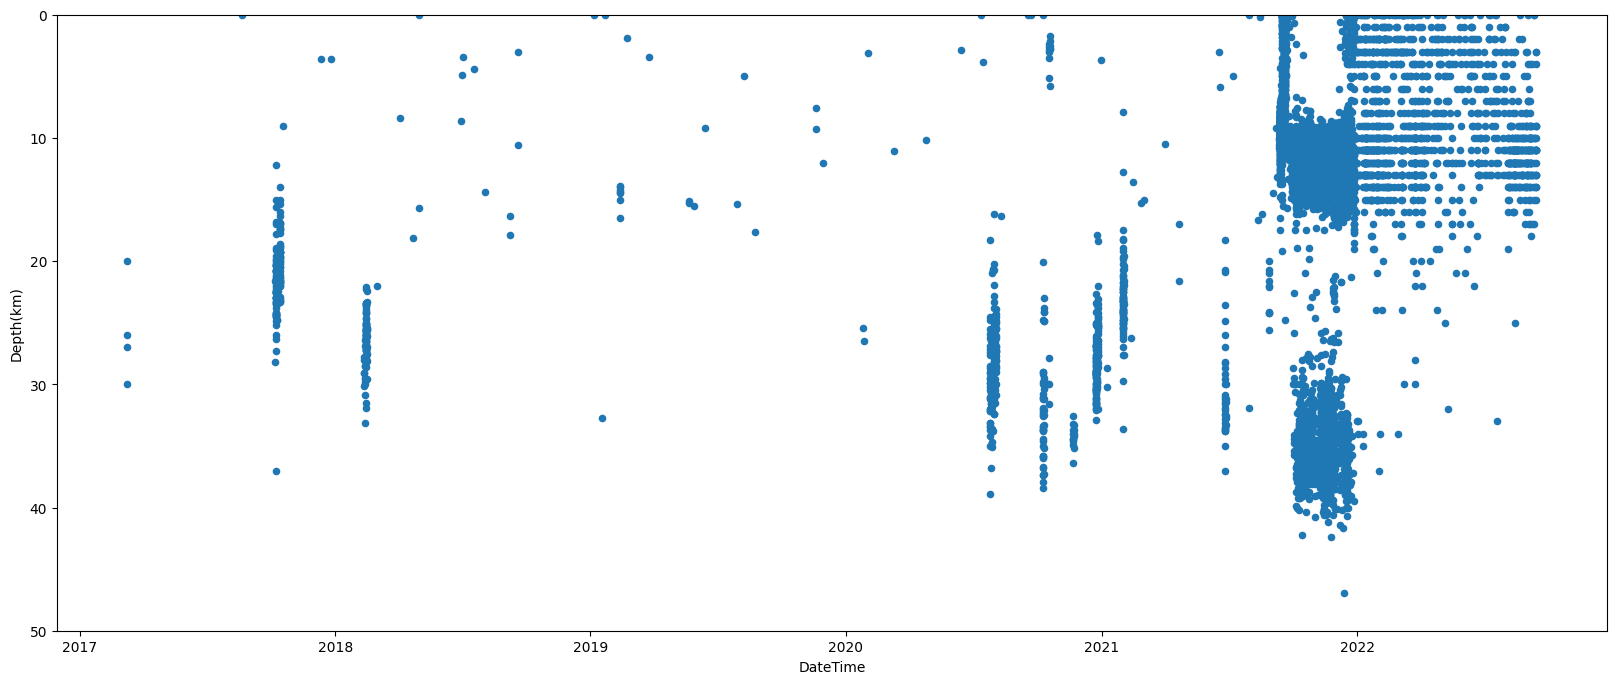

In [9]:
ax = df.plot.scatter(x="DateTime", y="Depth(km)", figsize=(20, 8))
ax.set_ylim(50, 0);